<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [37]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-07-16 05:18:37--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  31.6MB/s    in 1.1s    

2023-07-16 05:18:39 (31.6 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



Connect to the database.


In [38]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [39]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [40]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

## Demo: How to describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

In [42]:
QUERY = """
SELECT *
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
master_df = pd.read_sql_query(QUERY,conn)
master_df.head()

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy


# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


(array([7.926e+03, 1.733e+03, 1.620e+02, 7.600e+01, 6.500e+01, 5.000e+01,
        6.900e+01, 5.600e+01, 5.000e+01, 4.900e+01, 1.160e+02, 1.500e+01,
        1.600e+01, 1.800e+01, 9.000e+00, 6.000e+00, 1.000e+01, 5.000e+00,
        1.200e+01, 1.390e+02]),
 array([      0.,  100000.,  200000.,  300000.,  400000.,  500000.,
         600000.,  700000.,  800000.,  900000., 1000000., 1100000.,
        1200000., 1300000., 1400000., 1500000., 1600000., 1700000.,
        1800000., 1900000., 2000000.]),
 <BarContainer object of 20 artists>)

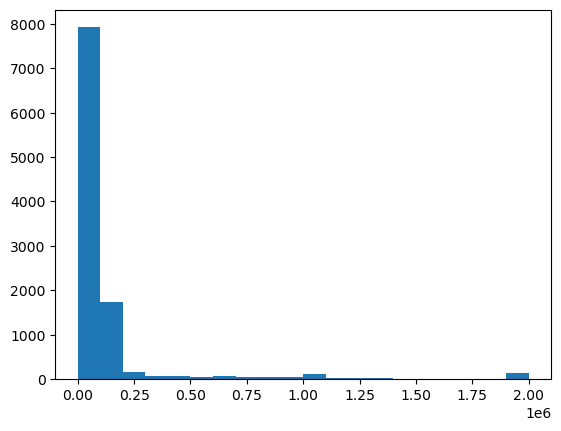

In [43]:
import matplotlib.pyplot as plt

plt.hist(master_df["ConvertedComp"], bins=20)

### Box Plots


Plot a box plot of `Age.`


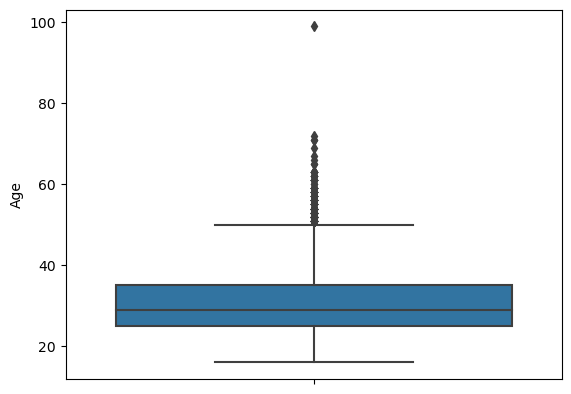

In [44]:
ax = sns.boxplot(y='Age', data=master_df)



## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


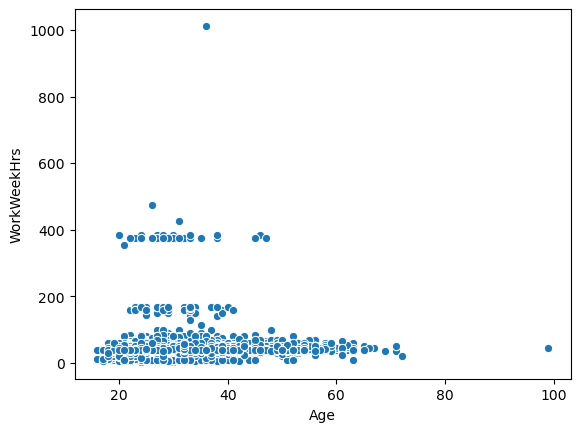

In [45]:
ax = sns.scatterplot(x='Age', y='WorkWeekHrs', data=master_df)

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


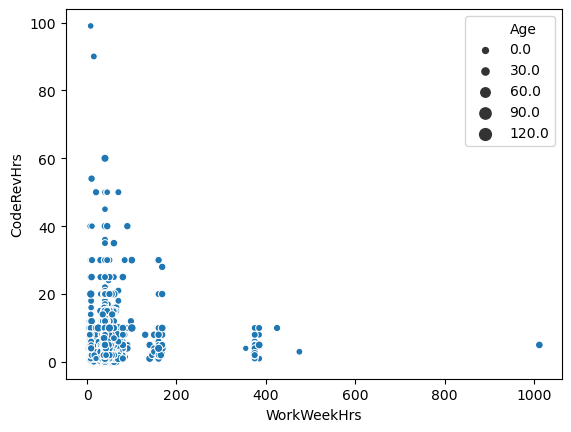

In [46]:
ax = sns.scatterplot(x='WorkWeekHrs', y='CodeRevHrs', size='Age', data=master_df)



In [53]:
QUERY = """
SELECT DatabaseDesireNextYear,COUNT(*) as count
FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by count desc limit 5
"""
DB_df = pd.read_sql_query(QUERY,conn)
DB_df

,DatabaseDesireNextYear,count
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


([<matplotlib.patches.Wedge at 0x7fc85ee00a10>,
 [Text(0.782460943602955, 0.7731460869305189, 'PostgreSQL'),
  Text(-0.6614558538043755, 0.8789062256395301, 'MongoDB'),
  Text(-1.0401617758478325, -0.35785958149123726, 'Redis'),
  Text(-0.05356333651009637, -1.0986951210330855, 'MySQL'),
  Text(0.9576877798968915, -0.5411414937298409, 'Elasticsearch')],
 [Text(0.4267968783288845, 0.42171604741664664, '25%'),
  Text(-0.36079410207511386, 0.47940339580338004, '21%'),
  Text(-0.5673609686442722, -0.1951961353588567, '19%'),
  Text(-0.02921636536914347, -0.5992882478362284, '19%'),
  Text(0.5223751526710316, -0.2951680874890041, '16%')])

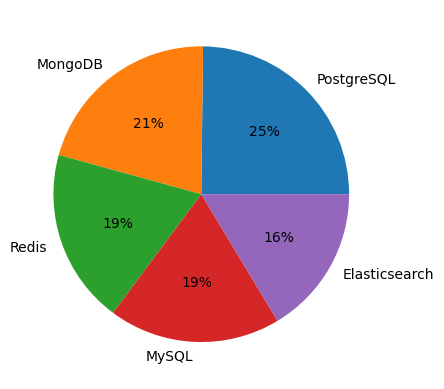

In [55]:
import matplotlib.pyplot as plt
data = DB_df["count"]
labels = DB_df["DatabaseDesireNextYear"]
plt.pie(data, labels = labels, autopct='%.0f%%')


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [58]:
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
where Age between 30 and 35
"""
df2 = pd.read_sql_query(QUERY,conn)

df2.shape


(2942, 3)

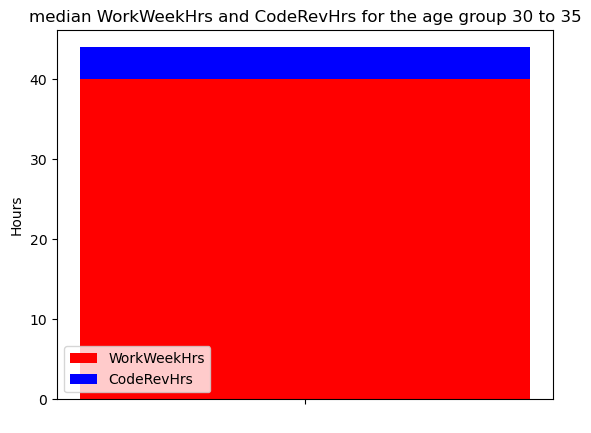

In [62]:
x= [' ']
y1 = df2["WorkWeekHrs"].median()
y2 = df2["CodeRevHrs"].median()

plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')

plt.ylabel("Hours")
plt.legend(["WorkWeekHrs", "CodeRevHrs"])
plt.title("median WorkWeekHrs and CodeRevHrs for the age group 30 to 35")
plt.show()

In [66]:
QUERY = """
SELECT LanguageDesireNextYear,COUNT(*) as count
FROM LanguageDesireNextYear
group by LanguageDesireNextYear
order by count desc 
"""
Lan_df = pd.read_sql_query(QUERY,conn)
Lan_df.head()

,LanguageDesireNextYear,count
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088


In [69]:
QUERY = """
SELECT LanguageWorkedWith
FROM LanguageWorkedWith

"""
DB2_df = pd.read_sql_query(QUERY,conn)
DB2_df.value_counts()

LanguageWorkedWith   
JavaScript               8687
HTML/CSS                 7830
SQL                      7106
Bash/Shell/PowerShell    4642
Python                   4542
Java                     4506
C#                       4288
TypeScript               3232
PHP                      2913
C++                      1946
C                        1578
Ruby                     1149
Go                       1114
Other(s):                 840
Kotlin                    751
Swift                     707
VBA                       628
R                         585
Objective-C               518
Scala                     492
Assembly                  437
Rust                      324
Dart                      237
Elixir                    187
Clojure                   164
F#                        158
WebAssembly               133
Erlang                     98
dtype: int64

In [160]:
QUERY = """
SELECT Respondent, Count(DatabaseWorkedWith) as Count, DatabaseWorkedWith
FROM DatabaseWorkedWith group by Respondent 

"""
DB2_df = pd.read_sql_query(QUERY,conn)
DB2_df

,Respondent,Count,DatabaseWorkedWith
0,4,2,MySQL
1,9,3,DynamoDB
2,13,4,Couchbase
3,16,3,MongoDB
4,17,2,MongoDB
...,...,...,...
10940,25136,1,Microsoft SQL Server
10941,25137,1,MySQL
10942,25138,1,PostgreSQL
10943,25141,2,Microsoft SQL Server


In [164]:
DB2_df = DB2_df[DB2_df["Count"] == 1]
DB2_df = DB2_df[DB2_df["DatabaseWorkedWith"] == "MySQL"]
DB2_df

,Respondent,Count,DatabaseWorkedWith
10,25,1,MySQL
61,129,1,MySQL
67,147,1,MySQL
68,148,1,MySQL
88,194,1,MySQL
...,...,...,...
10884,25007,1,MySQL
10888,25012,1,MySQL
10919,25091,1,MySQL
10929,25111,1,MySQL


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [182]:
Ages = [*range (45, 61)]
QUERY = """
SELECT Age, ConvertedComp
FROM master where Age between 45 AND 60 order by Age

"""
AgeandCC_df = pd.read_sql_query(QUERY,conn)
AgeandCC_df

,Age,ConvertedComp
0,45.0,72522.0
1,45.0,54876.0
2,45.0,185000.0
3,45.0,165000.0
4,45.0,130000.0
...,...,...
594,59.0,72530.0
595,59.0,160000.0
596,59.0,2000000.0
597,60.0,150000.0


In [190]:
Age_df = []
Age_median_CC_for_plotting = []
for age in Ages:
    Age_df = AgeandCC_df[AgeandCC_df['Age'] == age]
    median_age = Age_df["ConvertedComp"].median()
    Age_median_CC_for_plotting.append(median_age)
    
Age_median_CC_for_plotting


[90330.0,
 91593.0,
 91606.0,
 105750.0,
 85248.0,
 95000.0,
 100000.0,
 105500.0,
 100463.0,
 121000.0,
 119000.0,
 99530.5,
 117578.0,
 108000.0,
 110000.0,
 132287.5]

<AxesSubplot:>

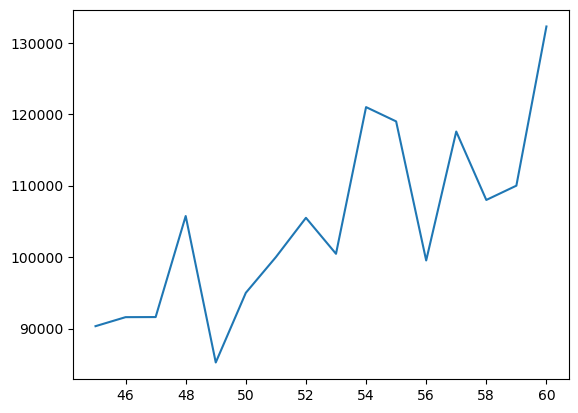

In [191]:
sns.lineplot(x=Ages, y=Age_median_CC_for_plotting)

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [199]:
# your code goes here

df_last=master_df.MainBranch.value_counts().rename_axis('Main_Branch').reset_index(name='Counts')
df_last

,Main_Branch,Counts
0,I am a developer by profession,10618
1,"I am not primarily a developer, but I write co...",780


<AxesSubplot:xlabel='Main_Branch', ylabel='Counts'>

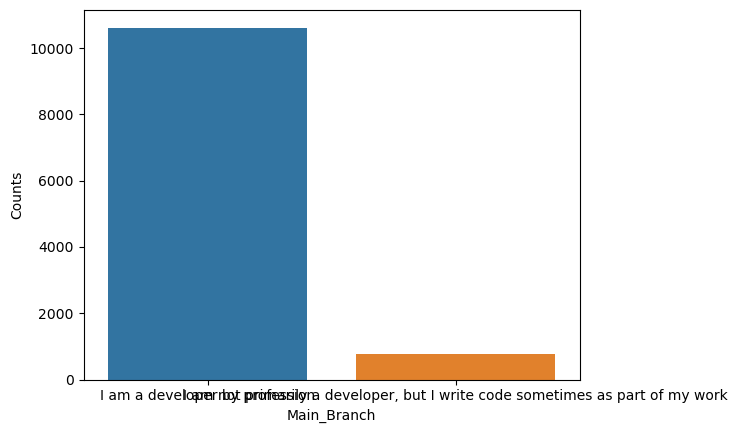

In [202]:
sns.barplot(data=df_last, x="Main_Branch", y="Counts")

In [208]:
QUERY = """
SELECT *
FROM DevType 

"""
Devdf = pd.read_sql_query(QUERY,conn)
Devdf

,Respondent,DevType
0,4,"Developer, full-stack"
1,9,Database administrator
2,9,"Developer, back-end"
3,9,"Developer, front-end"
4,9,"Developer, full-stack"
...,...,...
35309,25141,"Developer, mobile"
35310,25141,"Engineer, data"
35311,25141,"Engineer, site reliability"
35312,25141,System administrator


In [210]:
Devdf.DevType.value_counts()

Developer, full-stack                            6928
Developer, back-end                              6290
Developer, front-end                             3920
Developer, desktop or enterprise applications    2575
Developer, mobile                                1959
DevOps specialist                                1639
Database administrator                           1413
System administrator                             1202
Designer                                          988
Developer, QA or test                             911
Developer, embedded applications or devices       854
Engineer, data                                    832
Data scientist or machine learning specialist     803
Data or business analyst                          802
Student                                           766
Academic researcher                               556
Educator                                          514
Product manager                                   480
Developer, game or graphics 

Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
